In [2]:
import pandas as pd

# read solar energy data from CSV file and show the first few rows

solar = pd.read_csv("data/solar.csv")
solar.head(200)

,timestamp,solar
0,2023-03-18 00:01:57,32386.6000
1,2023-03-18 00:26:17,32386.6000
2,2023-03-18 00:38:26,32386.6000
3,2023-03-18 00:50:36,32386.6000
4,2023-03-18 01:02:46,32386.6000
...,...,...
195,2023-03-20 02:04:37,32393.8851
196,2023-03-20 02:16:46,32393.8851
197,2023-03-20 02:41:06,32393.8851
198,2023-03-20 02:53:15,32393.8851


In [3]:
# show the last few rows of the data
solar.tail()

,timestamp,solar
87803,2025-10-18 21:50:23,38343.1678
87804,2025-10-18 22:10:25,38343.1678
87805,2025-10-18 22:20:35,38343.1678
87806,2025-10-18 22:40:39,38343.1678
87807,2025-10-18 22:50:34,38343.1678


In [4]:
# show general information about the data
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87808 entries, 0 to 87807
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  87808 non-null  object 
 1   solar      87808 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB


In [5]:
# show statistical summary of the data
solar.describe()

,solar
count,87808.000000
mean,35415.581429
std,1598.023745
min,32386.600000
25%,34242.306400
50%,35422.915000
75%,36434.591100
max,38343.167800


In [4]:
# convert timestamp column to datetime format
solar['timestamp'] = pd.to_datetime(solar['timestamp'])
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87808 entries, 0 to 87807
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  87808 non-null  datetime64[ns]
 1   solar      87808 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.3 MB


In [5]:
# show first 20 rows to confirm timestamp conversion
solar.head(20)

,timestamp,solar
0,2023-03-18 00:01:57,32386.6
1,2023-03-18 00:26:17,32386.6
2,2023-03-18 00:38:26,32386.6
3,2023-03-18 00:50:36,32386.6
4,2023-03-18 01:02:46,32386.6
5,2023-03-18 01:27:04,32386.6
6,2023-03-18 01:39:14,32386.6
7,2023-03-18 01:51:23,32386.6
8,2023-03-18 02:03:33,32386.6
9,2023-03-18 02:15:42,32386.6


In [6]:
# solar column is now an additive meter. Calculate maximum value of solar per day by using groupby
# first create a date column
solar['date'] = solar['timestamp'].dt.date
# group by date and calculate maximum value
solar_daily_max = solar.groupby(solar['date']).max()


In [7]:
# reset index to make date a column again
solar_daily_max = solar_daily_max.reset_index()  
solar_daily_max.head()

,date,timestamp,solar
0,2023-03-18,2023-03-18 23:56:30,32391.7437
1,2023-03-19,2023-03-19 23:50:53,32393.8851
2,2023-03-20,2023-03-20 23:55:21,32396.6245
3,2023-03-21,2023-03-21 23:49:55,32400.2234
4,2023-03-22,2023-03-22 23:56:39,32401.6879


In [8]:
# remove the timestamp column as it's no longer needed
solar_daily_max = solar_daily_max.drop(columns=['timestamp'])

In [9]:
solar_daily_max.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    943 non-null    object 
 1   solar   943 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.9+ KB


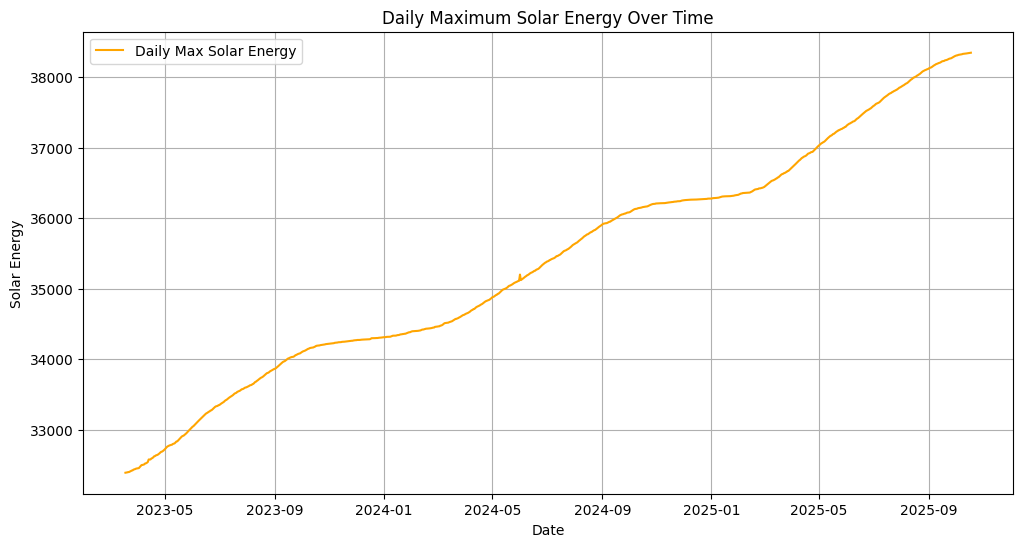

In [10]:
# make a graph of cleaned daily solar energy over time
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(solar_daily_max['date'], solar_daily_max['solar'], label='Daily Max Solar Energy', color='orange')
plt.xlabel('Date')
plt.ylabel('Solar Energy')
plt.title('Daily Maximum Solar Energy Over Time')
plt.legend()
plt.grid()

In [11]:
# calculate daily solar energy by taking the difference between consecutive days
solar_daily_max['daily_solar'] = solar_daily_max['solar'].diff()
solar_daily_max.tail(50)

,date,solar,daily_solar
893,2025-08-30,38108.7902,7.0752
894,2025-08-31,38112.3559,3.5657
895,2025-09-01,38120.8311,8.4752
896,2025-09-02,38128.6862,7.8551
897,2025-09-03,38131.7688,3.0826
898,2025-09-04,38137.9078,6.1390
899,2025-09-05,38147.1007,9.1929
900,2025-09-06,38155.3443,8.2436
901,2025-09-07,38165.3259,9.9816
902,2025-09-08,38172.0316,6.7057


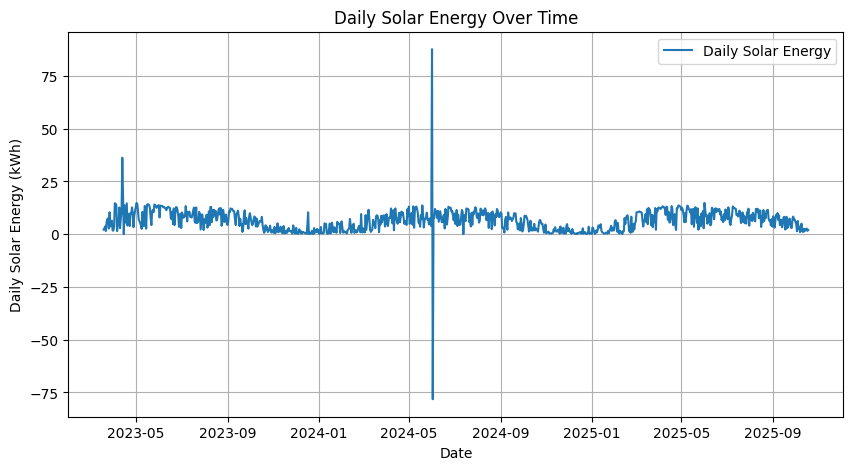

In [12]:
# make a graph of daily solar energy over time
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(solar_daily_max['date'], solar_daily_max['daily_solar'], label='Daily Solar Energy')
plt.xlabel('Date')  
plt.ylabel('Daily Solar Energy (kWh)')
plt.title('Daily Solar Energy Over Time')
plt.legend()
plt.grid()
plt.show()

In [13]:
# remove outliers where daily solar energy is negative or unreasonably high
solar_daily_max_cleaned = solar_daily_max[(solar_daily_max['daily_solar'] >= 0) & (solar_daily_max['daily_solar'] <= 20)]

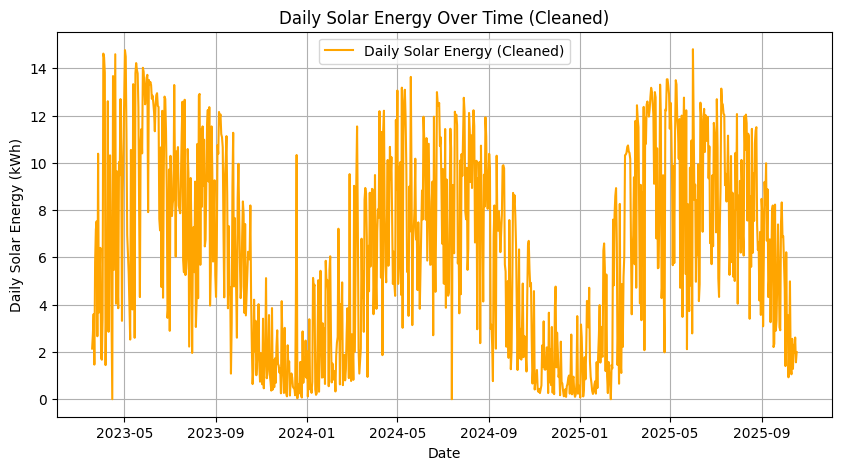

In [14]:
# recreate the graph with cleaned data
plt.figure(figsize=(10, 5))
plt.plot(solar_daily_max_cleaned['date'], solar_daily_max_cleaned['daily_solar'], label='Daily Solar Energy (Cleaned)', color='orange')
plt.xlabel('Date')
plt.ylabel('Daily Solar Energy (kWh)')
plt.title('Daily Solar Energy Over Time (Cleaned)')
plt.legend()
plt.grid()
plt.show()

In [15]:
# calculate the monthly solar production
solar_daily_max_cleaned['month'] = pd.to_datetime(solar_daily_max_cleaned['date']).dt.to_period('M')
monthly_solar = solar_daily_max_cleaned.groupby('month')['daily_solar'].sum().reset_index()
monthly_solar.head()

C:\Users\jcor864\AppData\Local\Temp\ipykernel_6756\3041404510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_daily_max_cleaned['month'] = pd.to_datetime(solar_daily_max_cleaned['date']).dt.to_period('M')


,month,daily_solar
0,2023-03,60.3036
1,2023-04,222.5549
2,2023-05,318.8890
3,2023-06,318.7741
4,2023-07,252.3007


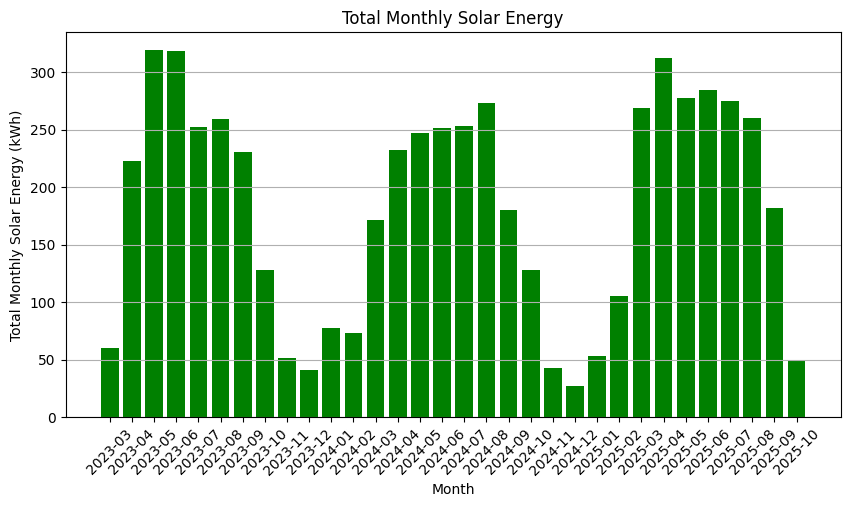

In [16]:
# create a barchart of monthly solar energy totals
plt.figure(figsize=(10, 5))
plt.bar(monthly_solar['month'].astype(str), monthly_solar['daily_solar'], color='green')
plt.xlabel('Month') 
plt.ylabel('Total Monthly Solar Energy (kWh)')
plt.title('Total Monthly Solar Energy')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [17]:
# Give the yearly totals for solar energy
solar_daily_max_cleaned['year'] = pd.to_datetime(solar_daily_max_cleaned['date']).dt.year
yearly_solar = solar_daily_max_cleaned.groupby('year')['daily_solar'].sum().reset_index()
yearly_solar

C:\Users\jcor864\AppData\Local\Temp\ipykernel_6756\473606281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_daily_max_cleaned['year'] = pd.to_datetime(solar_daily_max_cleaned['date']).dt.year


,year,daily_solar
0,2023,1882.4735
1,2024,1957.0564
2,2025,2066.2886


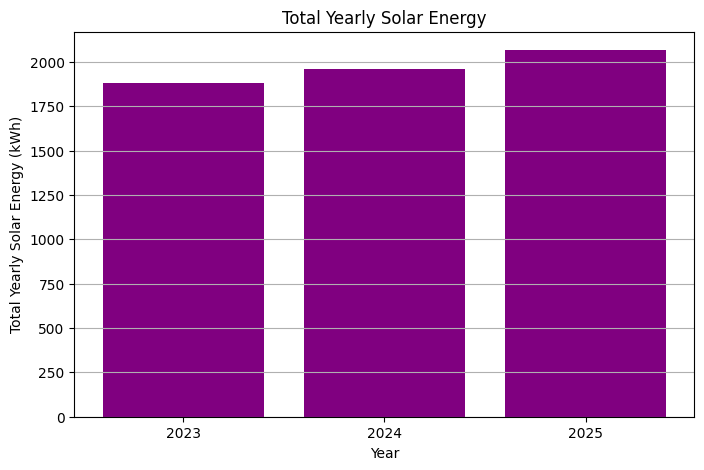

In [18]:
# visualize yearly solar energy totals with a bar chart
plt.figure(figsize=(8, 5))
plt.bar(yearly_solar['year'].astype(str), yearly_solar['daily_solar'], color='purple')
plt.xlabel('Year')
plt.ylabel('Total Yearly Solar Energy (kWh)')
plt.title('Total Yearly Solar Energy')
plt.grid(axis='y')
plt.show()